In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from collections import Counter
import random
import colorsys
#import hdbscan
import umap
import numpy as np
import pandas as pd
# bokeh basics
from bokeh.io import show, output_notebook
import numpy as np
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource, HoverTool, LinearColorMapper
from bokeh.palettes import plasma
from bokeh.plotting import figure
from bokeh.transform import transform
import bokeh.models as bmo
import random
import colorsys

def _get_colors(num_colors):
    colors=[]
    for i in np.arange(0., 360., 360. / num_colors):
        hue = i/360.
        lightness = (50 + np.random.rand() * 10)/100.
        saturation = (90 + np.random.rand() * 10)/100.
        colors.append(colorsys.hls_to_rgb(hue, lightness, saturation))
    return colors

thousand_colors = ['#%02x%02x%02x' % (int(c[0]*255), int(c[1]*255), int(c[2]*255)) for c in _get_colors(15)]
random.shuffle(thousand_colors)

### Import the data and load it in a dataframe of pandas 

In [4]:
df = pd.read_excel('Areas y población Mun_COL 2005_2017.xlsx').iloc[:-1,:]

In [3]:
df.head()

,DP,DPNOM,DPMP,MPIO,POBLACIÓN TOTAL 2005,POBLACIÓN CABECERA 2005,POBLACIÓN RESTO 2005,POBLACIÓN TOTAL 2017,POBLACIÓN CABECERA 2017,POBLACIÓN RESTO 2017,AREA EN KM2 CABECERA 2005,AREA EN KM2 CENTRO POBLADO 2005,AREA EN KM 2 RESTO 2005,AREA EN KM2 CABECERA 2017,AREA EN KM2 CENTRO POBLADO 2017,AREA EN KM 2 RESTO 2017
0,5,Antioquia,5001,Medellín,2214494,2175681,38813,2508452,2479990,28462,112.599136,3.333152,256.106044,109.980043,14.609643,242.850543
1,5,Antioquia,5002,Abejorral,20249,6271,13978,19096,6765,12331,1.153995,0.144522,505.945056,1.236794,0.106953,505.790367
2,5,Antioquia,5004,Abriaquí,2690,858,1832,2019,724,1295,0.531890,0.000000,287.578156,0.156826,0.029510,296.769644
3,5,Antioquia,5021,Alejandría,3816,1896,1920,3393,1804,1589,0.371011,0.000000,126.738351,0.399738,0.000000,128.532415
4,5,Antioquia,5030,Amagá,27155,14070,13085,29980,17174,12806,2.801529,0.130832,80.214944,1.509397,1.828286,80.794794


In [4]:
df.describe()

,DP,DPMP,POBLACIÓN TOTAL 2005,POBLACIÓN CABECERA 2005,POBLACIÓN RESTO 2005,POBLACIÓN TOTAL 2017,POBLACIÓN CABECERA 2017,POBLACIÓN RESTO 2017,AREA EN KM2 CABECERA 2005,AREA EN KM2 CENTRO POBLADO 2005,AREA EN KM 2 RESTO 2005,AREA EN KM2 CABECERA 2017,AREA EN KM2 CENTRO POBLADO 2017,AREA EN KM 2 RESTO 2017
count,1122.000000,1122.000000,1.122000e+03,1.122000e+03,1122.000000,1.122000e+03,1.122000e+03,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000
mean,38.282531,38716.410873,3.822513e+04,2.842184e+04,9803.291444,4.393192e+04,3.370415e+04,10227.770053,3.085113,0.456685,1013.052786,4.879983,0.915556,850.764482
std,26.588271,26574.905059,2.329032e+05,2.312218e+05,9926.745333,2.732377e+05,2.715673e+05,11762.363632,14.264436,1.105590,3211.782856,45.361030,1.756232,2937.666290
min,5.000000,5001.000000,0.000000e+00,0.000000e+00,0.000000,3.920000e+02,0.000000e+00,172.000000,0.000000,0.000000,0.000000,0.041805,0.000000,0.000000
25%,15.000000,15677.250000,6.817750e+03,1.693500e+03,4014.250000,6.697250e+03,1.911250e+03,3663.250000,0.306696,0.000000,127.820304,0.407813,0.050280,121.297972
50%,25.000000,25840.000000,1.251500e+04,4.158000e+03,7019.500000,1.357050e+04,5.013000e+03,6739.000000,0.697962,0.098596,280.058571,0.901225,0.310458,264.993219
75%,66.000000,66543.000000,2.384975e+04,1.079150e+04,12256.750000,2.685875e+04,1.319200e+04,12840.500000,1.805689,0.411744,706.791479,2.331975,0.965454,619.197173
max,99.000000,99773.000000,6.840116e+06,6.824507e+06,109982.000000,8.080734e+06,8.063991e+06,173143.000000,380.743770,14.012152,65560.804906,1432.794977,18.141420,65594.340099


### Make clustering with k means

Initially we will test using three clusters using different initial centroids so we can see if a three cluster system is actually a valid classification.

In [5]:
from sklearn.cluster import KMeans

In [6]:
#data = np.log(df.iloc[:, 4:].values + 1)
data = df.iloc[:, 4:].values
scaler = StandardScaler()
scaler.fit(data)
scaled = scaler.transform(data)

In [7]:
kmeans = KMeans(n_clusters=2, random_state=0,).fit(scaled)

In [8]:
reducer = umap.UMAP(n_neighbors=3, min_dist=0.1)
embedding = reducer.fit_transform(scaled)

/home/drdirac/TensorFlow_3.6/lib/python3.6/site-packages/umap/umap_.py:349: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "fuzzy_simplicial_set" failed type inference due to: Untyped global name 'nearest_neighbors': cannot determine Numba type of <class 'function'>

File "../../../../../TensorFlow_3.6/lib/python3.6/site-packages/umap/umap_.py", line 467:
def fuzzy_simplicial_set(
    <source elided>
    if knn_indices is None or knn_dists is None:
        knn_indices, knn_dists, _ = nearest_neighbors(
        ^

  @numba.jit()
/home/drdirac/TensorFlow_3.6/lib/python3.6/site-packages/numba/compiler.py:725: NumbaWarning: Function "fuzzy_simplicial_set" was compiled in object mode without forceobj=True.

File "../../../../../TensorFlow_3.6/lib/python3.6/site-packages/umap/umap_.py", line 350:
@numba.jit()
def fuzzy_simplicial_set(
^

  self.func_ir.loc))
/home/drdirac/TensorFlow_3.6/lib/python3.6/site-packages/numba/compiler.py:734: Nu

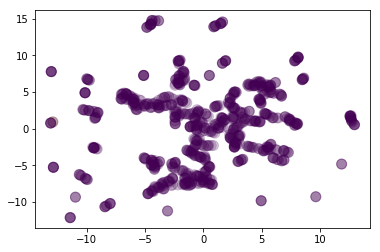

In [9]:
plt.scatter(*embedding.T, s=100, alpha=0.2,c=kmeans.labels_)
plt.show()

In [10]:
labels_string=[]
for ii in range(len(kmeans.labels_)):
    labels_string.append(str(kmeans.labels_[ii]))

In [12]:
logpop = np.power(df['POBLACIÓN TOTAL 2017'].values, 1/4)

source = ColumnDataSource(data=dict(x=embedding[:, 0], y=embedding[:, 1], desc=df['MPIO'],
                          size=logpop - min(logpop) + 1, clase=labels_string) )
hover = HoverTool(tooltips=[
    ("index", "$index"),
    ('comentario', '@desc'),
    ('size', '@size'),
    ('clusterid','@clase')
])

palette = thousand_colors[:len(set(labels_string))]

color_map = bmo.CategoricalColorMapper(factors=list(set(labels_string)), palette=palette)


In [13]:
p = figure(plot_width=800, plot_height=800, tools=[hover, 'wheel_zoom', 'pan'], title="Comentarios")

p = figure(plot_width=800, plot_height=800, tools=[hover, 'wheel_zoom', 'pan'], title="Municipios")
p.circle('x', 'y', size='size', source=source, alpha=0.5,fill_color=transform('clase', color_map))
output_file('log_data_with_features.html')
show(p)

In [14]:
"""
logpop = np.power(df['POBLACIÓN TOTAL 2017'].values, 1/4)

source = ColumnDataSource(data=dict(x=embedding[:, 0], y=embedding[:, 1], desc=df['MPIO'],
                          size=logpop - min(logpop) + 1) )
hover = HoverTool(tooltips=[
    ("index", "$index"),
    ('comentario', '@desc'),
    ('size', '@size')
])

p = figure(plot_width=800, plot_height=800, tools=[hover, 'wheel_zoom', 'pan'], title="Municipios")
p.circle('x', 'y', size='size', source=source, alpha=0.5)
output_file('raw_data.html')
show(p)
"""

'\nlogpop = np.power(df[\'POBLACIÓN TOTAL 2017\'].values, 1/4)\n\nsource = ColumnDataSource(data=dict(x=embedding[:, 0], y=embedding[:, 1], desc=df[\'MPIO\'],\n                          size=logpop - min(logpop) + 1) )\nhover = HoverTool(tooltips=[\n    ("index", "$index"),\n    (\'comentario\', \'@desc\'),\n    (\'size\', \'@size\')\n])\n\np = figure(plot_width=800, plot_height=800, tools=[hover, \'wheel_zoom\', \'pan\'], title="Municipios")\np.circle(\'x\', \'y\', size=\'size\', source=source, alpha=0.5)\noutput_file(\'raw_data.html\')\nshow(p)\n'

### Gap Statistics clustering of the data

The gap statistics criterion is tested in the scaled original data and the data with additional characteristics.

In [7]:
from gap import gap 

#### Original scaled data 

In [19]:
num_clusters,oldclusters,oldlabels,gaps,sk=gap(scaled,maxtime=10,file_save_data='scaled_data_report.txt')

1   -4.3365048725120605   0.022298393944709474
2   -3.0617665394074347   0.026474513738444477
3   -2.8015335504548746   0.031198689733491675
4   -2.596362175833899   0.031684177066407505
5   -2.4702994946250594   0.0394335850821504
6   -2.076492735488684   0.03034958669111291
7   -1.9540027214755584   0.04780027089599305
8   -1.8221738952838056   0.0335041235778393
9   -1.6874197845615233   0.0413308086559671
10   -1.630312096658462   0.03586153569104086
11   -2.007299342779426   0.0336948975096991
12   -1.9148055938113502   0.03920467453865252
13   -1.920213381044239   0.0334469091971426
14   -1.8193519593505043   0.04255664728068232
15   -1.5694867376746955   0.03902150612441033
16   -1.6283992344249263   0.03953807039836219
17   -1.5621246871775654   0.041505411943355004
18   -1.5542248569540378   0.04091462178942293
19   -1.3976873499800948   0.03111422793194596
20   -1.3903806092418274   0.030665471311358574
21   -1.320178697652533   0.0362403521426818
22   -1.2809294083995024   0

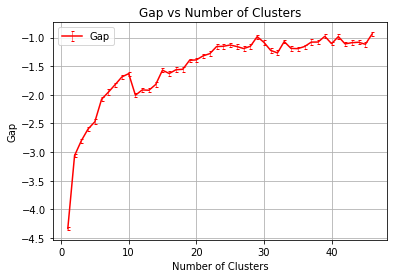

In [21]:
plt.errorbar(num_clusters,gaps[:-1],color='red',yerr=sk[:-1],capsize=1.5,elinewidth=0.5)
legend = ['Gap']
plt.xlabel("Number of Clusters")
plt.ylabel("Gap")
plt.legend(legend)
#plt.xticks(range(0, 20))
#plt.yticks(range(1, 20))
plt.title("Gap vs Number of Clusters \n Scaled data")
#plt.ylim(0,200)
#plt.xlim(0.45,0.55)
plt.grid()
#image_name='Gap_vs_Number_Of_Clusters.pdf'
#plt.savefig(image_name,bbox_inches='tight')
plt.show()

The gap statistic criterion does not give a optimal number of clusters for the scaled data

#### Adding new features

An initial thing to do is to add features that are important in measuring the expansion of a town. In particular we add new variables
\begin{align}
\rho_\text{year} &= \frac{\text{population in year}}{\text{area in year}}\\
\Delta \text{population} &= \frac{\text{population in 2017}}{ \text{population in 2005}}\\
\Delta \text{area} &= \frac{\text{area in 2017} }{ \text{area in 2005}}\\
C &= \rho_{2017}-\rho_{2005}
\end{align}

In [8]:
df_augmented=df.copy(deep=True)

df_augmented['dens_2005_cab'] = df_augmented.iloc[:, 5].values/(df_augmented.iloc[:, 10].values + 1)
df_augmented['dens_2005_res'] = df_augmented.iloc[:, 6].values/(df_augmented.iloc[:, 12].values + 1)
df_augmented['dens_2017_cab'] = df_augmented.iloc[:, 8].values/(df_augmented.iloc[:, 13].values + 1)
df_augmented['dens_2017_res'] = df_augmented.iloc[:, 9].values/(df_augmented.iloc[:, 15].values + 1)

df_augmented['del_pop_tot'] = df_augmented.iloc[:, 7].values / (df_augmented.iloc[:, 4].values + 1)
df_augmented['del_pop_cab'] = df_augmented.iloc[:, 8].values / (df_augmented.iloc[:, 5].values + 1)
df_augmented['del_pop_res'] = df_augmented.iloc[:, 9].values / (df_augmented.iloc[:, 6].values + 1)

df_augmented['del_are_cab'] = df_augmented.iloc[:, 13].values / (df_augmented.iloc[:, 10].values + 1)
df_augmented['del_are_cen'] = df_augmented.iloc[:, 14].values / (df_augmented.iloc[:, 11].values + 1)
df_augmented['del_are_res'] = df_augmented.iloc[:, 15].values / (df_augmented.iloc[:, 12].values + 1)

df_augmented['c_cab'] = df_augmented['dens_2017_cab'].values - df_augmented['dens_2005_cab'].values
df_augmented['c_res'] = df_augmented['dens_2017_res'].values - df_augmented['dens_2005_res'].values


In [30]:
data = np.hstack((np.log(df_augmented.iloc[:, 4:16].values + 1), df_augmented.iloc[:, 16:]) )
#data = df.iloc[:, 4:]
scaler = StandardScaler()
scaler.fit(data)
augmented_scaled = scaler.transform(data)

In [31]:
num_clusters_augmented,oldclusters_augmented,oldlabels_augmented,gaps_augmented,sk_augmented=gap(augmented_scaled,maxtime=5,file_save_data='augmented_data_report.txt')

1   -3.774397782697684   0.01972243461567548
2   -2.6172765835947   0.02506097233743685
3   -2.380435333962332   0.04415792195441877
4   -2.4200934722785616   0.03229825464225236
5   -2.101572598468551   0.04970270553080569
6   -2.0271404692974158   0.03990024271105296
7   -2.22079849601871   0.041936710064048546
8   -2.1405024316662336   0.03954839024827691
9   -2.0578550552448776   0.04256699532503949
10   -2.0181068804709525   0.02623828594656159
11   -1.8393801937057375   0.04314644919853682
12   -1.8984141035572806   0.02888230266357414
13   -1.8506206800172593   0.039036157963113716
14   -1.8323320169277153   0.038840698990978785
15   -1.7228817612072083   0.03742703567390666
16   -1.7651335375984152   0.028226595068894536
17   -1.6863399772670196   0.029409143725723914
18   -1.6436850429719172   0.03711493578902749
19   -1.6091554684439204   0.039972683095496925
20   -1.5620199588190948   0.03707528405283504


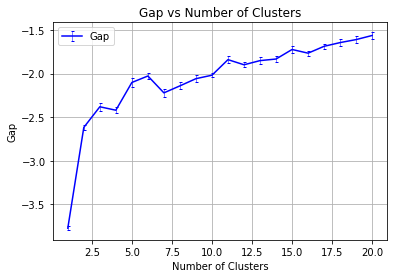

In [32]:
plt.errorbar(num_clusters_augmented,gaps_augmented[:-1],color='blue',yerr=sk_augmented[:-1],capsize=1.5,elinewidth=0.5)
legend = ['Gap']
plt.xlabel("Number of Clusters")
plt.ylabel("Gap")
plt.legend(legend)
#plt.xticks(range(0, 20))
#plt.yticks(range(1, 20))
plt.title("Gap vs Number of Clusters \n Scales augmented data")
#plt.ylim(0,200)
#plt.xlim(0.45,0.55)
plt.grid()
#image_name='Gap_vs_Number_Of_Clusters.pdf'
#plt.savefig(image_name,bbox_inches='tight')
plt.show()

The gap statistic criterion does not give an optimal amount of clusters for the data

#### Original data without scaling
The scaled data seems to have not a definite number of clusters hence we proceed to test the original data with the Gap Statistics criterion.

In [33]:
data = df.iloc[:, 4:].values
num_clusters_original,oldclusters_original,oldlabels_original,gaps_original,sk_original=gap(data,maxtime=5,file_save_data='original_data_report.txt')

1   -0.3220572957418959   0.04359707337192074
2   0.22087572714095938   0.0651814350435966
3   0.529493408958758   0.09725440119684607
4   1.1077696603518232   0.12006065803529696
5   1.124245830481705   0.12283294487094436
6   0.9771795965034364   0.16786825162479507
7   1.0018368288685089   0.22289246146959024
8   0.6364936329059931   0.25465850351153607
9   0.7205150476944508   0.2534581410586163
10   0.5105764270560984   0.18865069296454748
11   0.5412296399381757   0.18685836286494242
12   0.4528942808457055   0.18506830986993542
13   0.27418545912594094   0.19697865966551867
14   0.38091336636685114   0.17308529295272154
15   0.3820534263876558   0.17989890324342733
16   0.3474949934054461   0.19915359581041547
17   0.40782518141933544   0.16240940694513514
18   0.5339881426814079   0.1077063990836884
19   0.415268184682847   0.15201682733526384
20   0.40444684058424407   0.13670709299984105
21   0.4467640242964315   0.17968799918798625


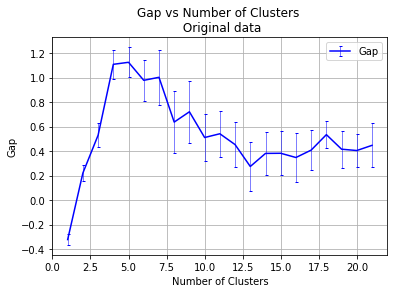

In [34]:
plt.errorbar(num_clusters_original,gaps_original[:-1],color='blue',yerr=sk_original[:-1],capsize=1.5,elinewidth=0.5)
legend = ['Gap']
plt.xlabel("Number of Clusters")
plt.ylabel("Gap")
plt.legend(legend)
#plt.xticks(range(0, 20))
#plt.yticks(range(1, 20))
plt.title("Gap vs Number of Clusters \n Original data")
#plt.ylim(0,200)
#plt.xlim(0.45,0.55)
plt.grid()
#image_name='Gap_vs_Number_Of_Clusters.pdf'
#plt.savefig(image_name,bbox_inches='tight')
plt.show()

There is a global maximum of the gap statistic at 5 clusters, such that this clustering clasify the towns by size and amount of inhabitants. There is big cluster corresponding to the small towns, another cluster with only one element that correspond to the Bogotá D.C. and set of three intermediate clusters with intermediate size towns.

/home/drdirac/TensorFlow_3.6/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 14 separate connected components using meta-embedding (experimental)
  n_components
/home/drdirac/TensorFlow_3.6/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


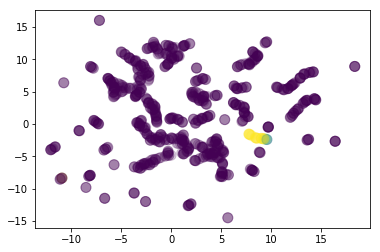

In [38]:
data = df.iloc[:, 4:].values
kmeans = KMeans(n_clusters=5, random_state=0,).fit(data)
reducer = umap.UMAP(n_neighbors=3, min_dist=0.1)
embedding = reducer.fit_transform(data)
plt.scatter(*embedding.T, s=100, alpha=0.2,c=kmeans.labels_)
plt.show()

In [41]:
labels_string=[]
for ii in range(len(kmeans.labels_)):
    labels_string.append(str(kmeans.labels_[ii]))
    
logpop = np.power(df['POBLACIÓN TOTAL 2017'].values, 1/4)

source = ColumnDataSource(data=dict(x=embedding[:, 0], y=embedding[:, 1], desc=df['MPIO'],
                          size=logpop - min(logpop) + 1, clase=labels_string) )
hover = HoverTool(tooltips=[
    ("index", "$index"),
    ('comentario', '@desc'),
    ('size', '@size'),
    ('clusterid','@clase')
])

palette = thousand_colors[:len(set(labels_string))]

color_map = bmo.CategoricalColorMapper(factors=list(set(labels_string)), palette=palette)

p = figure(plot_width=800, plot_height=800, tools=[hover, 'wheel_zoom', 'pan'], title="Comentarios")

p = figure(plot_width=800, plot_height=800, tools=[hover, 'wheel_zoom', 'pan'], title="Municipios")
p.circle('x', 'y', size='size', source=source, alpha=0.5,fill_color=transform('clase', color_map))
output_file('original_data_with_features.html')
show(p)

#### Augmented original data without scaling
The scaled data seems to have not a definite number of clusters hence we proceed to test the original data with the Gap Statistics criterion.

In [35]:
data = np.hstack((np.log(df_augmented.iloc[:, 4:16].values + 1), df_augmented.iloc[:, 16:]) )
num_clusters_original_aug,oldclusters_original_aug,oldlabels_original_aug,gaps_original_aug,sk_original_aug=gap(data,maxtime=5,file_save_data='original_aug_data_report.txt')

1   0.015746713750584895   0.038313669719079776
2   0.01936615537412223   0.05016593059773142
3   -0.07213181833619853   0.11056559593331075
4   0.09818188685918283   0.09620822559620114
5   -0.036858003459054434   0.1168280079694388
6   -0.13707482966039386   0.12075546319937636
7   -0.042034640199666296   0.10805261726315532
8   0.059674107028102163   0.07967536527128352
9   0.7071114466720632   0.09546369709015007
10   0.6404345583659659   0.09682097267291927
11   0.5116006411592178   0.10737386576182932
12   0.48325059265212733   0.12273454686513204
13   0.37801362051916687   0.11533901105428376
14   0.3441508580040158   0.10728440788298445
15   0.4082744003003449   0.12079280960053285
16   0.41673306508423424   0.1311690093216514
17   0.5181143732792521   0.11072997442298696
18   0.4021226446266484   0.10279684044313205
19   0.24471689713967537   0.09143747471533055
20   0.38315397189792266   0.08977567042073842


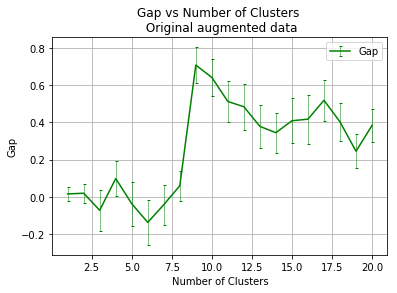

In [37]:
plt.errorbar(num_clusters_original_aug,gaps_original_aug[:-1],color='green',yerr=sk_original_aug[:-1],capsize=1.5,elinewidth=0.5)
legend = ['Gap']
plt.xlabel("Number of Clusters")
plt.ylabel("Gap")
plt.legend(legend)
#plt.xticks(range(0, 20))
#plt.yticks(range(1, 20))
plt.title("Gap vs Number of Clusters \n Original augmented data")
#plt.ylim(0,200)
#plt.xlim(0.45,0.55)
plt.grid()
#image_name='Gap_vs_Number_Of_Clusters.pdf'
#plt.savefig(image_name,bbox_inches='tight')
plt.show()

The optimal amount of clusters according to the gap statistic criterion is 9, however is not clear how the clustering is clasifying the data, so a better exploration of the clustering must be done. Is interesting to note that using 4 clusters with the augmented data gives a different classification than the one obtained with the original data, these 4 clusters divide the towns by size and amount of inhabitants. 

/home/drdirac/TensorFlow_3.6/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 37 separate connected components using meta-embedding (experimental)
  n_components
/home/drdirac/TensorFlow_3.6/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


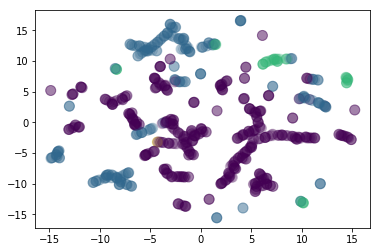

In [50]:
data = np.hstack((np.log(df_augmented.iloc[:, 4:16].values + 1), df_augmented.iloc[:, 16:]) )
kmeans = KMeans(n_clusters=4, random_state=0,).fit(data)
reducer = umap.UMAP(n_neighbors=3, min_dist=0.1)
embedding = reducer.fit_transform(data)
plt.scatter(*embedding.T, s=100, alpha=0.2,c=kmeans.labels_)
plt.show()

In [51]:
labels_string=[]
for ii in range(len(kmeans.labels_)):
    labels_string.append(str(kmeans.labels_[ii]))
    
logpop = np.power(df['POBLACIÓN TOTAL 2017'].values, 1/4)

source = ColumnDataSource(data=dict(x=embedding[:, 0], y=embedding[:, 1], desc=df['MPIO'],
                          size=logpop - min(logpop) + 1, clase=labels_string) )
hover = HoverTool(tooltips=[
    ("index", "$index"),
    ('comentario', '@desc'),
    ('size', '@size'),
    ('clusterid','@clase')
])

palette = thousand_colors[:len(set(labels_string))]

color_map = bmo.CategoricalColorMapper(factors=list(set(labels_string)), palette=palette)

p = figure(plot_width=800, plot_height=800, tools=[hover, 'wheel_zoom', 'pan'], title="Comentarios")

p = figure(plot_width=800, plot_height=800, tools=[hover, 'wheel_zoom', 'pan'], title="Municipios")
p.circle('x', 'y', size='size', source=source, alpha=0.5,fill_color=transform('clase', color_map))
output_file('original_augmented_data_with_features.html')
show(p)

### Augmented and scaled data, reduced with UMAP to 10 dimensions

In [9]:
data = np.hstack((np.log(df_augmented.iloc[:, 4:16].values + 1), df_augmented.iloc[:, 16:]) )
#scaler = StandardScaler()
#scaler.fit(data)
#augmented_scaled = scaler.transform(data)
augmented_scaled = data
reducer = umap.UMAP(n_neighbors=50, min_dist=0, n_components=10)
embedded = reducer.fit_transform(data)

/home/vladimir/anaconda3/lib/python3.7/site-packages/umap/umap_.py:349: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "fuzzy_simplicial_set" failed type inference due to: Untyped global name 'nearest_neighbors': cannot determine Numba type of <class 'function'>

File "../../../../anaconda3/lib/python3.7/site-packages/umap/umap_.py", line 467:
def fuzzy_simplicial_set(
    <source elided>
    if knn_indices is None or knn_dists is None:
        knn_indices, knn_dists, _ = nearest_neighbors(
        ^

  @numba.jit()
/home/vladimir/anaconda3/lib/python3.7/site-packages/numba/compiler.py:742: NumbaWarning: Function "fuzzy_simplicial_set" was compiled in object mode without forceobj=True.

File "../../../../anaconda3/lib/python3.7/site-packages/umap/umap_.py", line 350:
@numba.jit()
def fuzzy_simplicial_set(
^

  self.func_ir.loc))
/home/vladimir/anaconda3/lib/python3.7/site-packages/numba/compiler.py:751: NumbaDeprecationWarning: 
Fall

In [47]:
num_clusters_aug_red, oldclusters_aug_red, oldlabels_aug_red, gaps_aug_red, sk_aug_red = gap(embedded,maxtime=5,file_save_data='scaled_aug_red_data_report.txt')

1   -0.004503558336614644   0.060576353323730764
2   0.1926509007830437   0.20187371168244556
3   0.2782563344235762   0.1373463677871423
4   -0.08528885959015398   0.258617439263678
5   0.21557309835169192   0.22186463370326256
6   1.3188608847255407   0.19985917710331663
7   1.3648538487700261   0.238551044546969
8   1.4129557181884569   0.2866220458666529
9   1.4130332575154547   0.26118563614295054
10   1.4545115928198458   0.2979666774817702
11   1.7730574584549033   0.2531414060976585
12   1.2659719304950499   0.21117535463908246
13   2.1456302004249785   0.19623663366116828
14   2.0604586814962627   0.19629542870339203
15   2.216869857906051   0.16935418703759023
16   2.3602637407241884   0.16570962594233093
17   1.9997808925145468   0.15756765009384768
18   2.36592452046353   0.1641378017328611
19   2.606220580658311   0.12957888387679442
20   2.750095270526753   0.13634252880335146
21   2.3326292454351405   0.12710588791499672
22   2.819255560523255   0.1321003389976451
23   3

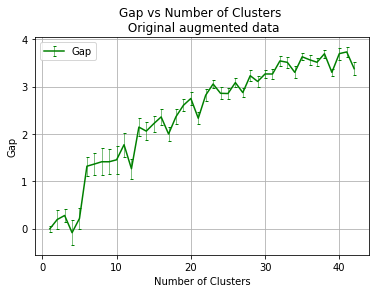

In [48]:
plt.errorbar(num_clusters_aug_red, gaps_aug_red[:-1], color='green',yerr=sk_aug_red[:-1],capsize=1.5,elinewidth=0.5)
legend = ['Gap']
plt.xlabel("Number of Clusters")
plt.ylabel("Gap")
plt.legend(legend)
#plt.xticks(range(0, 20))
#plt.yticks(range(1, 20))
plt.title("Gap vs Number of Clusters \n Original augmented data")
#plt.ylim(0,200)
#plt.xlim(0.45,0.55)
plt.grid()
#image_name='Gap_vs_Number_Of_Clusters.pdf'
#plt.savefig(image_name,bbox_inches='tight')
plt.show()

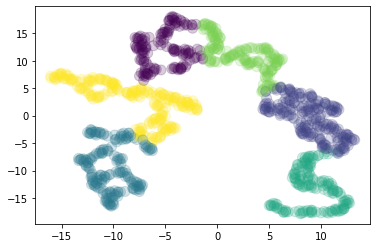

In [10]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(embedded)
reducer = umap.UMAP(n_neighbors=20, min_dist=0.9)
embedding = reducer.fit_transform(embedded)
plt.scatter(*embedding.T, s=100, alpha=0.2,c=kmeans.labels_)
plt.show()

In [14]:
labels_string=[]
for ii in range(len(kmeans.labels_)):
    labels_string.append(str(kmeans.labels_[ii]))
    
logpop = np.power(df['POBLACIÓN TOTAL 2017'].values, 1/4)

source = ColumnDataSource(data=dict(x=embedding[:, 0], y=embedding[:, 1], desc=df['MPIO'],
                          logsize=logpop - min(logpop) + 1, clase=labels_string, size=df['POBLACIÓN TOTAL 2017'].values))
hover = HoverTool(tooltips=[
    ("index", "$index"),
    ('comentario', '@desc'),
    ('size', '@size'),
    ('clusterid','@clase')
])

palette = thousand_colors[:len(set(labels_string))]

color_map = bmo.CategoricalColorMapper(factors=list(set(labels_string)), palette=palette)

p = figure(plot_width=800, plot_height=800, tools=[hover, 'wheel_zoom', 'pan'], title="Comentarios")

p = figure(plot_width=800, plot_height=800, tools=[hover, 'wheel_zoom', 'pan'], title="Municipios")
p.circle('x', 'y', size='logsize', source=source, alpha=0.5,fill_color=transform('clase', color_map))
output_file('scaled_augmented_reduced_data_with_features.html')
show(p)

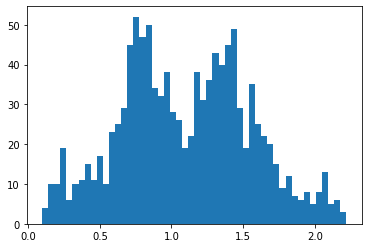

In [22]:
dists = np.min(kmeans.transform(embedded), axis=1)

plt.hist(dists,bins=50)
plt.show()

idx = np.where(dists<1.2)

In [23]:
source = ColumnDataSource(data=dict(x=embedding[:, 0][idx], y=embedding[:, 1][idx], desc=df['MPIO'].values[idx],
                          logsize=logpop[idx] - min(logpop) + 1, clase=np.array(labels_string)[idx], size=df['POBLACIÓN TOTAL 2017'].values[idx]))
hover = HoverTool(tooltips=[
    ("index", "$index"),
    ('comentario', '@desc'),
    ('size', '@size'),
    ('clusterid','@clase')
])

palette = thousand_colors[:len(set(labels_string))]

color_map = bmo.CategoricalColorMapper(factors=list(set(labels_string)), palette=palette)

p = figure(plot_width=800, plot_height=800, tools=[hover, 'wheel_zoom', 'pan'], title="Comentarios")

p = figure(plot_width=800, plot_height=800, tools=[hover, 'wheel_zoom', 'pan'], title="Municipios")
p.circle('x', 'y', size='logsize', source=source, alpha=0.5,fill_color=transform('clase', color_map))
output_file('scaled_augmented_reduced_data_with_features_significative.html')
show(p)

In [24]:
from sklearn.mixture import GaussianMixture as GMM

In [34]:
components_range = range(2, 50)
bics = []
best = 0
best_bic = np.infty

for n_components in components_range:
    gmm = GMM(n_components=n_components)
    gmm.fit(embedded)
    newbic = gmm.bic(embedded)
    bics.append(newbic)
    if newbic < best_bic:
        best_bic = newbic
        best = gmm
    print(n_components, newbic)

2 -28891.129174074867
3 -38032.056297164636
4 -43595.77108936152
5 -47590.41039051949
6 -48813.49050714889
7 -49928.687252628864
8 -51761.79394098177
9 -53503.31683123234
10 -53718.11536655292
11 -55580.4918506002
12 -55993.878056787624
13 -56432.23397122337
14 -56705.40460423449
15 -57145.26454939773
16 -57390.21297999794
17 -57807.850831782984
18 -57488.53271055077
19 -58136.14010003883
20 -58072.40794693543
21 -57997.95989522168
22 -58450.79417662589
23 -58558.38412934836
24 -58242.11654985038
25 -58479.814847736285
26 -58273.7425904665
27 -58275.98909783451
28 -58116.87604465688
29 -59015.037182633954
30 -58402.51780299199
31 -58167.14251341611
32 -58325.423064148286
33 -58273.31128445432
34 -57821.070890869
35 -58121.95035703794
36 -57419.62262265355
37 -57814.69233508558
38 -57420.85862607433
39 -57395.379257642446
40 -56427.40309649799
41 -57181.15820381571
42 -56838.82494091675
43 -57112.85127025969
44 -56561.7861251454
45 -56481.41828605944
46 -56098.947879360596
47 -55927.765

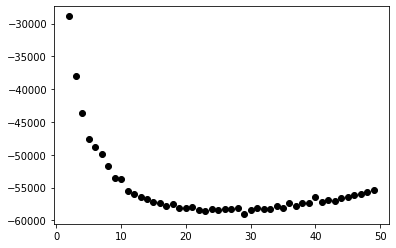

In [35]:
plt.plot(components_range, bics, 'ko')
plt.show()

In [51]:
gmm = GMM(n_components=6, n_init=100)
gmm.fit(embedded)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=6, n_init=100,
                precisions_init=None, random_state=None, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

In [52]:
labels_string=[]
gmmlabels = gmm.predict(embedded)
for ii in range(len(gmmlabels)):
    labels_string.append(str(gmmlabels[ii]))
    
logpop = np.power(df['POBLACIÓN TOTAL 2017'].values, 1/4)

source = ColumnDataSource(data=dict(x=embedding[:, 0], y=embedding[:, 1], desc=df['MPIO'],
                          logsize=logpop - min(logpop) + 1, clase=labels_string, size=df['POBLACIÓN TOTAL 2017'].values))
hover = HoverTool(tooltips=[
    ("index", "$index"),
    ('comentario', '@desc'),
    ('size', '@size'),
    ('clusterid','@clase')
])

palette = thousand_colors[:len(set(labels_string))]

color_map = bmo.CategoricalColorMapper(factors=list(set(labels_string)), palette=palette)

p = figure(plot_width=800, plot_height=800, tools=[hover, 'wheel_zoom', 'pan'], title="Comentarios")

p = figure(plot_width=800, plot_height=800, tools=[hover, 'wheel_zoom', 'pan'], title="Municipios")
p.circle('x', 'y', size='logsize', source=source, alpha=0.5,fill_color=transform('clase', color_map))
output_file('scaled_augmented_reduced_data_with_features_gmm.html')
show(p)